In [44]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.figure_factory as ff 
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from plotly import tools
import plotly.express as px
init_notebook_mode(connected=False)  # Set notebook mode to work in offline
from sklearn.model_selection import train_test_split
#Statistical libraries an ML
import scipy
import statistics
import sklearn
from sklearn.cluster import KMeans
import statsmodels as sm
from scipy import stats
from scipy.stats import norm

In [4]:
df = pl.read_csv("/Users/egortuzarov/Downloads/SMRT_dataset_grouped_pc_rt_names_delta.csv")

In [5]:
df

shape: (84_813, 1_181)
┌───────┬────────┬─────────┬─────────┬───┬──────────┬──────────┬────────┬─────────┐
│       ┆ rt     ┆ R3e+    ┆ R2e+    ┆ … ┆ L3m      ┆ Vm       ┆ P1s    ┆ L1m     │
│ ---   ┆ ---    ┆ ---     ┆ ---     ┆   ┆ ---      ┆ ---      ┆ ---    ┆ ---     │
│ i64   ┆ f64    ┆ f64     ┆ f64     ┆   ┆ f64      ┆ f64      ┆ f64    ┆ f64     │
╞═══════╪════════╪═════════╪═════════╪═══╪══════════╪══════════╪════════╪═════════╡
│ 0     ┆ 29.7   ┆ 0.023   ┆ -0.0211 ┆ … ┆ -0.0817  ┆ -0.0026  ┆ 0.095  ┆ 0.0536  │
│ 1     ┆ -84.7  ┆ -0.04   ┆ 0.0561  ┆ … ┆ 0.0124   ┆ -0.0026  ┆ -0.123 ┆ -0.0425 │
│ 2     ┆ -280.1 ┆ -0.1819 ┆ 0.0916  ┆ … ┆ 0.0214   ┆ 0.0346   ┆ 0.163  ┆ 0.0359  │
│ 3     ┆ 29.6   ┆ 0.0421  ┆ 0.0024  ┆ … ┆ -0.0018  ┆ -0.0128  ┆ 0.077  ┆ 0.0013  │
│ 4     ┆ 364.5  ┆ -0.138  ┆ -0.0442 ┆ … ┆ 0.0994   ┆ -0.0021  ┆ 0.048  ┆ 0.0162  │
│ …     ┆ …      ┆ …       ┆ …       ┆ … ┆ …        ┆ …        ┆ …      ┆ …       │
│ 84808 ┆ 86.9   ┆ -0.186  ┆ -0.1683 ┆ … ┆ 0.01889  ┆ -0.00661 ┆ -0.083 ┆ -0.0188 │
│ 84809 ┆ -38.7  ┆ -0.187  ┆ -0.1643 ┆ … ┆ 0.01889  ┆ -0.00435 ┆ -0.087 ┆ -0.0115 │
│ 84810 ┆ -38.7  ┆ 0.294   ┆ -0.1503 ┆ … ┆ 0.01884  ┆ 0.003104 ┆ -0.123 ┆ -0.0085 │
│ 84811 ┆ -125.6 ┆ -0.001  ┆ 0.004   ┆ … ┆ 0.0      ┆ 0.00226  ┆ -0.004 ┆ 0.0073  │
│ 84812 ┆ -125.6 ┆ 0.48    ┆ 0.018   ┆ … ┆ -0.00005 ┆ 0.009714 ┆ -0.04  ┆ 0.0103  │
└───────┴────────┴─────────┴─────────┴───┴──────────┴──────────┴────────┴─────────┘

In [19]:
a  = df.select(pl.corr("rt", "R3e+")).to_series()[0]
a

-0.05616036851484062

In [15]:
cols = df.columns

In [25]:
features = []
for col in cols:
    a = df.select(pl.corr("rt",col)).to_series()[0]
    if a > 0.2:
        print(f"{col:<10}\t{a:<10}")
        features.append(col)

rt        	1.0       
F01[N-O]  	0.3318126502449318
SaaO      	0.2779380613715951
SaaN      	0.2682077609321407
naasC     	0.2110439224237495
SsCH3     	0.21467443486009227
ATSC1dv   	0.3211324895476418
ATSC3dv   	0.3248966500617249
AATSC1dv  	0.3233520871803238
AATSC1are 	0.3816872045183065
AATSC2dv  	0.4580036256810694
ATSC3s    	0.22669481532445646
ATSC3se   	0.2001036513174324
AATSC2se  	0.23031918719064223
ATSC2m    	0.26395026622490153
AATSC1se  	0.4048938192102541
BCUTse-1h 	0.2742862868131943
CATS2D_05_AL	0.22358009391803924
CATS2D_08_AL	0.23838512871682627
CATS2D_03_AL	0.2692263108731265
CATS2D_04_AL	0.2923668571650199
CATS2D_01_AA	0.358443859881327
CATS2D_00_AA	0.21754542836380422
CATS2D_02_LL	0.23827947238361297
CATS3D_04_AL	0.23696577818869402
CATS3D_02_LL	0.2218331730488665
CATS3D_00_AA	0.21754542836380422
CATS3D_01_AA	0.358443859881327
QCss      	0.23172644519477872
QNmax     	0.3911175852415884
Mnc       	0.3172644017371156
Tnc       	0.2534882887302961
Rpc       	0.2176

In [26]:
len(features)

59

In [27]:
df2 = df[features]

In [29]:
df2

shape: (84_813, 59)
┌────────┬──────────┬──────┬─────────┬───┬──────────┬─────────┬────────┬─────────┐
│ rt     ┆ F01[N-O] ┆ SaaO ┆ SaaN    ┆ … ┆ RDF020m  ┆ TDB06p  ┆ TDB06e ┆ TDB04i  │
│ ---    ┆ ---      ┆ ---  ┆ ---     ┆   ┆ ---      ┆ ---     ┆ ---    ┆ ---     │
│ f64    ┆ f64      ┆ f64  ┆ f64     ┆   ┆ f64      ┆ f64     ┆ f64    ┆ f64     │
╞════════╪══════════╪══════╪═════════╪═══╪══════════╪═════════╪════════╪═════════╡
│ 29.7   ┆ 0.0      ┆ 0.0  ┆ -0.001  ┆ … ┆ 0.0016   ┆ 0.117   ┆ 0.077  ┆ 0.0501  │
│ -84.7  ┆ 0.0      ┆ 0.0  ┆ 0.3114  ┆ … ┆ -0.02968 ┆ -0.058  ┆ 0.025  ┆ -0.0198 │
│ -280.1 ┆ 0.0      ┆ 0.0  ┆ -0.009  ┆ … ┆ -0.0183  ┆ 0.109   ┆ 0.022  ┆ 0.032   │
│ 29.6   ┆ 0.0      ┆ 0.0  ┆ 0.0001  ┆ … ┆ 0.0012   ┆ 0.028   ┆ -0.086 ┆ 0.0091  │
│ 364.5  ┆ 0.667    ┆ 0.0  ┆ -0.1724 ┆ … ┆ -0.03811 ┆ -0.034  ┆ -0.106 ┆ 0.07    │
│ …      ┆ …        ┆ …    ┆ …       ┆ … ┆ …        ┆ …       ┆ …      ┆ …       │
│ 86.9   ┆ 0.0      ┆ 0.0  ┆ 0.006   ┆ … ┆ -0.0433  ┆ 0.0648  ┆ -0.055 ┆ 0.16    │
│ -38.7  ┆ 0.0      ┆ 0.0  ┆ 0.002   ┆ … ┆ -0.0798  ┆ 0.0307  ┆ -0.037 ┆ 0.168   │
│ -38.7  ┆ 0.0      ┆ 0.0  ┆ -0.001  ┆ … ┆ -0.0768  ┆ 0.0864  ┆ -0.078 ┆ 0.154   │
│ -125.6 ┆ 0.0      ┆ 0.0  ┆ -0.004  ┆ … ┆ -0.0365  ┆ -0.0341 ┆ 0.018  ┆ 0.008   │
│ -125.6 ┆ 0.0      ┆ 0.0  ┆ -0.007  ┆ … ┆ -0.0335  ┆ 0.0216  ┆ -0.023 ┆ -0.006  │
└────────┴──────────┴──────┴─────────┴───┴──────────┴─────────┴────────┴─────────┘

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

def stat_plot(df, x, Title=None, normalise=False, a=1, b=1):
    if normalise:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - a * IQR
        upper_limit = Q3 + b * IQR

        df_n = df[(df[x] > lower_limit) & (df[x] < upper_limit)]
        plt.figure(figsize=(8, 6))
        sns.histplot(df_n[x], kde=True)
        plt.title(x, size=14)
        plt.xlabel(x, size=12)
        plt.ylabel("Frequency", size=12)
        plt.show()
        
        (mu, sigma) = norm.fit(df_n[x])  # mu: mean, sigma: standard deviation
        print(f"Mean: {mu}, Standard deviation: {sigma}")

        plt.figure(figsize=(8, 6))
        plt.title("QQ Plot")
        stats.probplot(df_n[x], plot=plt)
        plt.show()
        
        return df_n
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[x], kde=True)
        plt.title(Title, size=14)
        plt.xlabel(x, size=12)
        plt.ylabel("Frequency", size=12)
        plt.show()
        
        (mu, sigma) = norm.fit(df[x])  # mu: mean, sigma: standard deviation
        print(f"Mean: {mu}, Standard deviation: {sigma}")

        plt.figure(figsize=(8, 6))
        plt.title("QQ Plot")
        stats.probplot(df[x], plot=plt)
        plt.show()


In [41]:
df3 = df2.to_pandas()

In [65]:
df3.columns

Index(['rt', 'F01[N-O]', 'SaaO', 'SaaN', 'naasC', 'SsCH3', 'ATSC1dv',
       'ATSC3dv', 'AATSC1dv', 'AATSC1are', 'AATSC2dv', 'ATSC3s', 'ATSC3se',
       'AATSC2se', 'ATSC2m', 'AATSC1se', 'BCUTse-1h', 'CATS2D_05_AL',
       'CATS2D_08_AL', 'CATS2D_03_AL', 'CATS2D_04_AL', 'CATS2D_01_AA',
       'CATS2D_00_AA', 'CATS2D_02_LL', 'CATS3D_04_AL', 'CATS3D_02_LL',
       'CATS3D_00_AA', 'CATS3D_01_AA', 'QCss', 'QNmax', 'Mnc', 'Tnc', 'Rpc',
       'Chi0v', 'Chi0n', 'RHSA', 'FNSA-3', 'Psychotic-80', 'Psychotic-50',
       'GATS5c', 'MATS1se', 'MATS2se', 'MATS2dv', 'MATS2m', 'MATS3dv',
       'MATS3d', 'MATS1dv', 'MATS1are', 'AMID_O', 'LipoaffinityIndex',
       'ALOGP2', 'Mor30i', 'slogPVSA7', 'P_VSA_s_6', 'VSAEstate0', 'RDF020m',
       'TDB06p', 'TDB06e', 'TDB04i'],
      dtype='object')

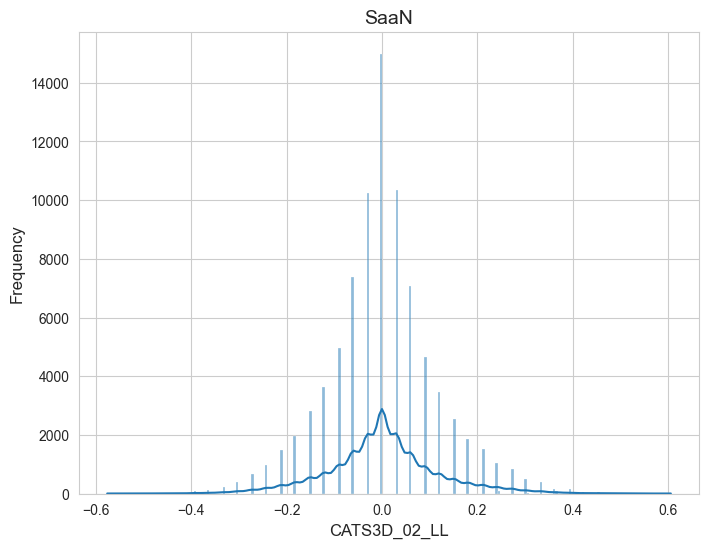

Mean: 0.0019616226286064634, Standard deviation: 0.1171183871796399


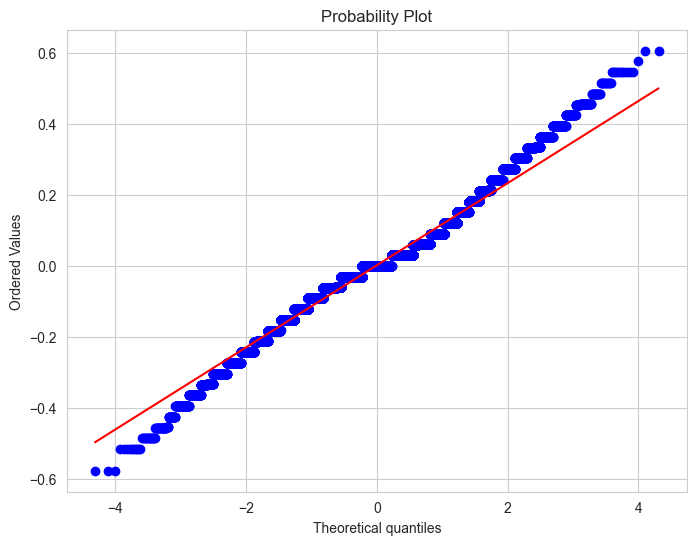

In [72]:
some_data = stat_plot(df3, 'CATS3D_02_LL' , Title = 'SaaN', normalise = 0 , a = 8 , b = 8)

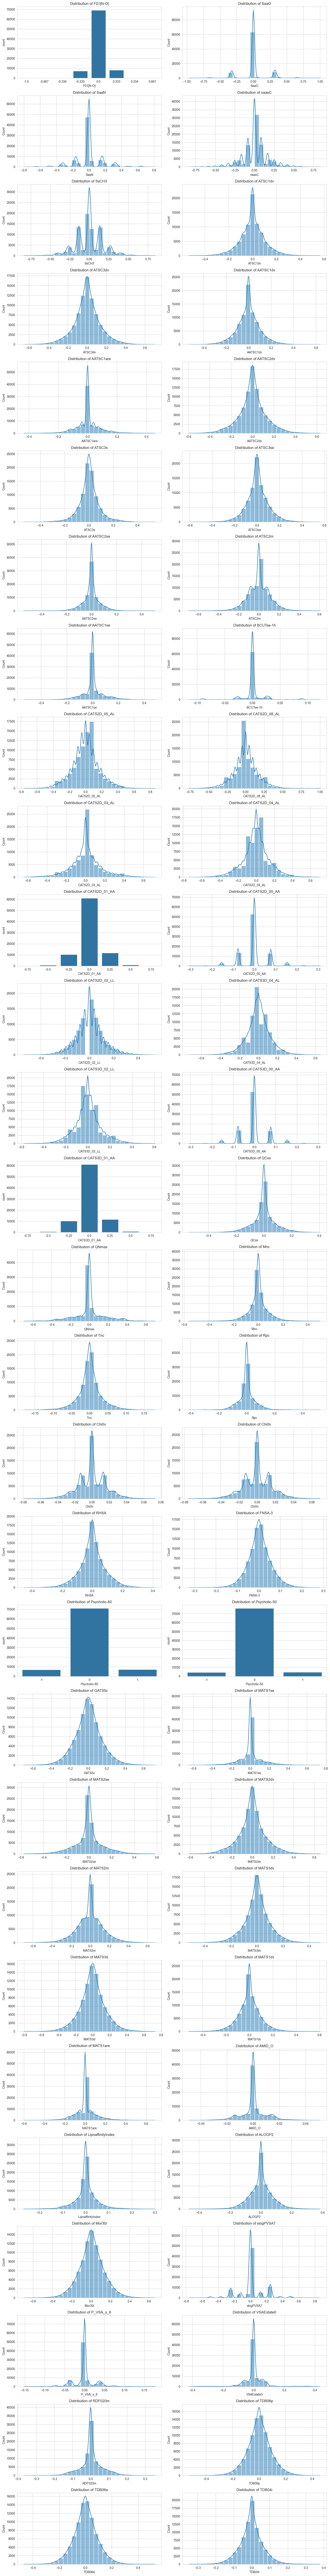

In [59]:
sns.set_style('whitegrid')

# List of column names to plot
columns_to_plot = df3.columns.drop(['rt'])

num_rows = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 2, i)
    
    if df3[column].nunique() <= 10:
        sns.countplot(x=column, data=df3)
    else:
        sns.histplot(df3[column], kde=True, bins=30)
        
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    
plt.show()